In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np
import jax.numpy as jnp

from utils import manifold, metrics, costs
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

from functools import partial

In [2]:
def preprocess(data):
    return data

file_name = "double_pendulum_1000_500_v0.5"
out_name = file_name
raw_data = np.load("data/" + file_name + ".npz")
raw_data, params = raw_data["data"], raw_data["params"]

E = params[:,0]
E1 = params[:,1]
E2 = params[:,2]

data = preprocess(raw_data)

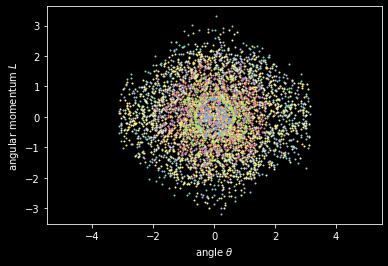

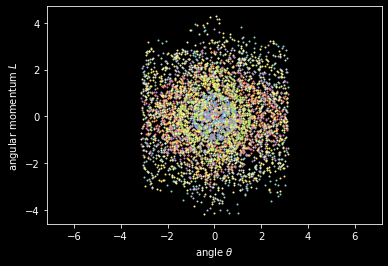

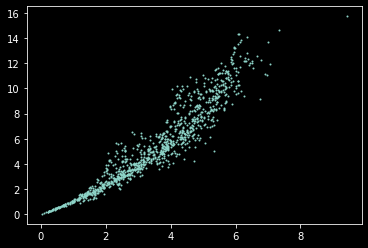

In [4]:
plt.figure()
for traj in raw_data[:10]:
    plt.scatter(traj[:,0], traj[:,1], s=1)
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"angular momentum $L$")
plt.axis('equal')

plt.figure()
for traj in raw_data[:10]:
    plt.scatter(traj[:,2], traj[:,3], s=1)
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"angular momentum $L$")
plt.axis('equal')

plt.figure()
plt.scatter(E+3, E1+E2, s=1);

Distance matrix: batch 1 of 25
Distance matrix: batch 2 of 25
Distance matrix: batch 3 of 25
Distance matrix: batch 4 of 25
Distance matrix: batch 5 of 25
Distance matrix: batch 6 of 25
Distance matrix: batch 7 of 25
Distance matrix: batch 8 of 25
Distance matrix: batch 9 of 25
Distance matrix: batch 10 of 25
Distance matrix: batch 11 of 25
Distance matrix: batch 12 of 25
Distance matrix: batch 13 of 25
Distance matrix: batch 14 of 25
Distance matrix: batch 15 of 25
Distance matrix: batch 16 of 25
Distance matrix: batch 17 of 25
Distance matrix: batch 18 of 25
Distance matrix: batch 19 of 25
Distance matrix: batch 20 of 25
Distance matrix: batch 21 of 25
Distance matrix: batch 22 of 25
Distance matrix: batch 23 of 25
Distance matrix: batch 24 of 25
Distance matrix: batch 25 of 25
Converged? True
[]


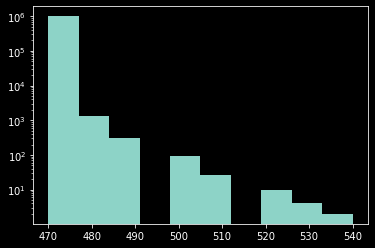

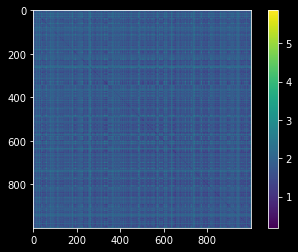

In [7]:
cost_fn = costs.PeriodicEuclidean(jnp.array([2*jnp.pi, jnp.inf, 2*jnp.pi, jnp.inf]))
metric = partial(metrics.wasserstein_metric, cost_fn=cost_fn)
dist_mat, converged, steps = metrics.distance_matrix(data, metric=metric, batch_size=200, mesh_shape=(4,2))

print("Converged?", jnp.all(converged))
print(np.stack(np.where(1-converged), axis=1))

plt.figure()
plt.hist([steps.reshape(-1)], log=True)
plt.figure()
plt.imshow(dist_mat)
plt.colorbar();

In [3]:
# np.savez(out_name + "_dist_mat.npz", dist_mat=dist_mat)
dist_mat = np.load(out_name + "_dist_mat.npz")['dist_mat']

In [6]:
evals, embedding, epsilon = manifold.diffusion_map(dist_mat, n_components=20, epsilon='max', n_neighbors=50, alpha=1, robust=True)

nn_max = 2.854973139785277
epsilon = 16.301743257790804
mean_shift = 0.0012616680675447468


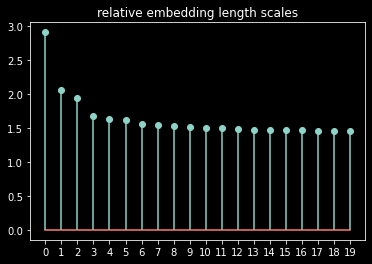

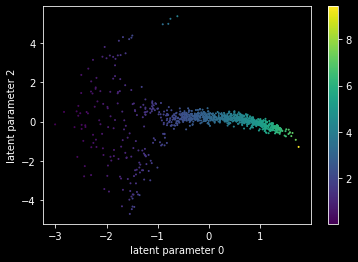

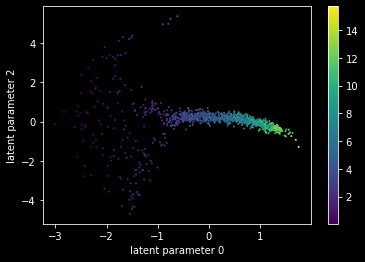

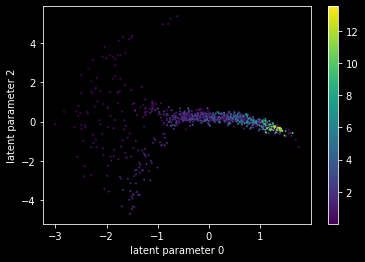

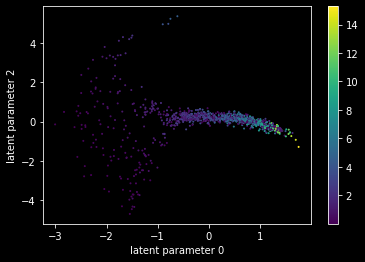

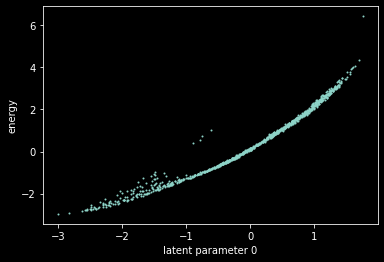

In [7]:
plt.figure()
# plt.stem(1/np.sqrt(-evals), use_line_collection=True)
plt.stem(np.sqrt(-epsilon/np.log(1+evals)), use_line_collection=True)
plt.title('relative embedding length scales')
plt.xticks(ticks=range(evals.shape[0]))

plt.figure()
plt.scatter(embedding[:,0], embedding[:,2], c=E+3, s=1)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 2")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], embedding[:,2], c=E1+E2, s=1)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 2")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], embedding[:,2], c=E1, s=1)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 2")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], embedding[:,2], c=E2, s=1)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 2")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], E, s=1)
plt.xlabel("latent parameter 0")
plt.ylabel("energy");

In [22]:
from scipy.stats import spearmanr
spearmanr(embedding[:, 0], E)

SpearmanrResult(correlation=0.9963959523959524, pvalue=0.0)

[264 684 860 866]
[-0.79176408 -0.90067152 -0.61450507 -0.75002306]


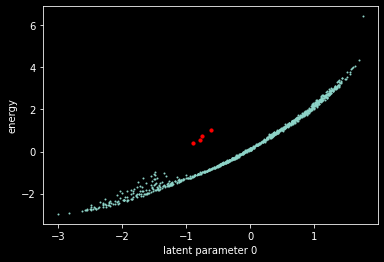

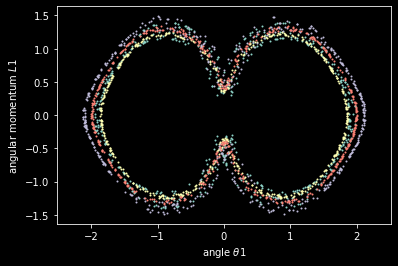

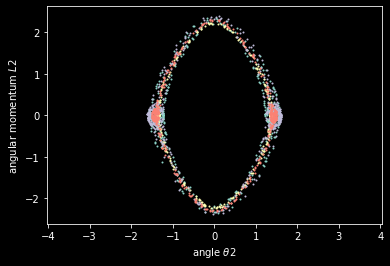

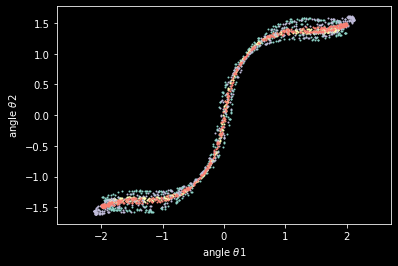

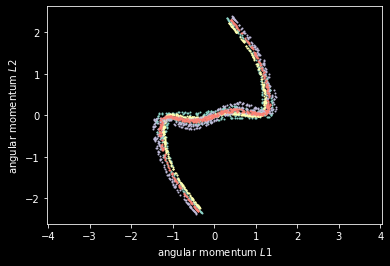

In [8]:
data_filter = (E>0) & (E<1.5) & (embedding[:,0]>-1) & (embedding[:,0]<-0.5)
print(np.where(data_filter)[0])
print(embedding[data_filter,0])

plt.figure()
plt.scatter(embedding[:,0], E, s=1)
plt.scatter(embedding[data_filter,0], E[data_filter], s=10, color='red')
plt.xlabel("latent parameter 0")
plt.ylabel("energy");

plt.figure()
for traj in data[data_filter]:
    plt.scatter(traj[:,0], traj[:,1], s=1)
plt.xlabel(r"angle $\theta$1")
plt.ylabel(r"angular momentum $L$1")
plt.axis('equal')

plt.figure()
for traj in data[data_filter]:
    plt.scatter(traj[:,2], traj[:,3], s=1)
plt.xlabel(r"angle $\theta$2")
plt.ylabel(r"angular momentum $L$2")
plt.axis('equal');

plt.figure()
for traj in data[data_filter]:
    plt.scatter(traj[:,0], traj[:,2], s=1)
plt.xlabel(r"angle $\theta$1")
plt.ylabel(r"angle $\theta$2")
plt.axis('equal');

plt.figure()
for traj in data[data_filter]:
    plt.scatter(traj[:,1], traj[:,3], s=1)
plt.xlabel(r"angular momentum $L$1")
plt.ylabel(r"angular momentum $L$2")
plt.axis('equal');

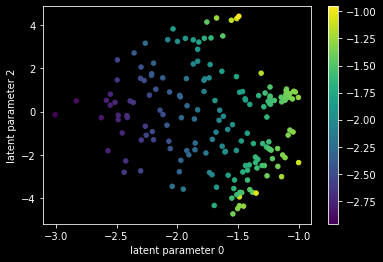

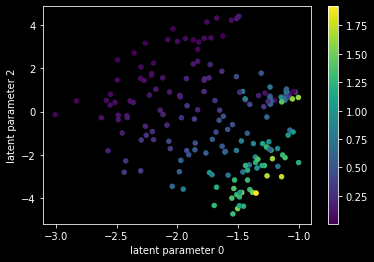

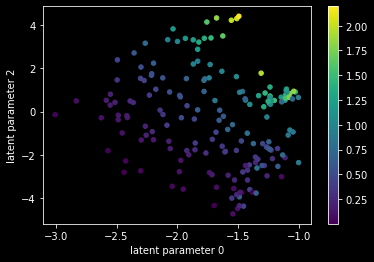

In [10]:
emb1 = 0
emb2 = 2
data_filter = embedding[:,0] < -1
s = 20

plt.figure()
plt.scatter(embedding[data_filter,emb1], embedding[data_filter,emb2], c=E[data_filter], s=s)
plt.xlabel(f"latent parameter {emb1}")
plt.ylabel(f"latent parameter {emb2}")
plt.colorbar()

plt.figure()
plt.scatter(embedding[data_filter,emb1], embedding[data_filter,emb2], c=E1[data_filter], s=s)
plt.xlabel(f"latent parameter {emb1}")
plt.ylabel(f"latent parameter {emb2}")
plt.colorbar()

plt.figure()
plt.scatter(embedding[data_filter,emb1], embedding[data_filter,emb2], c=E2[data_filter], s=s)
plt.xlabel(f"latent parameter {emb1}")
plt.ylabel(f"latent parameter {emb2}")
plt.colorbar()

[0]


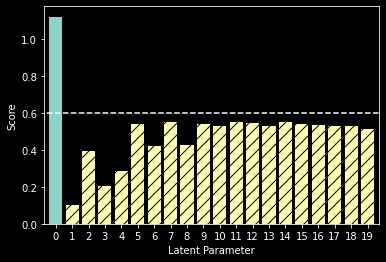

In [11]:
threshold = 0.6
n_components = evals.shape[0]

embed_list, scores_pass, scores_fail = manifold.heuristic_importance_score(evals, embedding, threshold=threshold, weights="adjusted")
print(embed_list)

plt.bar(list(range(n_components)), scores_pass)
plt.bar(list(range(n_components)), scores_fail, hatch='//')
plt.xticks(ticks=range(n_components))
plt.xlim(-0.7, n_components-0.3)
# plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Latent Parameter")
plt.hlines(threshold, -1, n_components, 'white', linestyles='dashed');
# plt.savefig("unpredictability_scores.png", dpi=300)

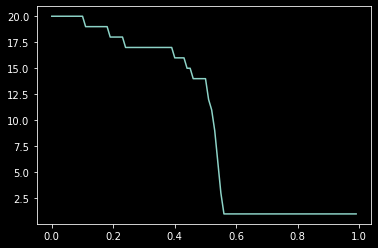

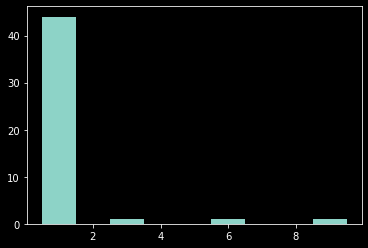

In [44]:
embedding_size_list = []
for thres in np.arange(0.0, 1., 0.01):
    embedding_size_list.append(len(manifold.heuristic_importance_score(evals, embedding, threshold=thres, weights="adjusted")[0]))

plt.figure()
plt.plot(np.arange(0.0, 1., 0.01), embedding_size_list)
plt.figure()
plt.hist(embedding_size_list, bins=np.arange(10)+0.5);

[0, 2]


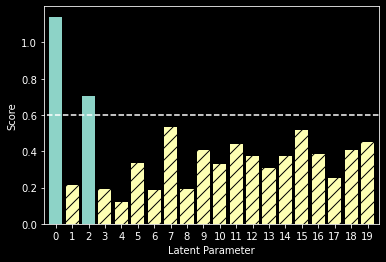

In [12]:
embedding2 = embedding[embedding[:,0] < -1,:]
embedding2 -= np.mean(embedding2, axis=0)
renorm = np.linalg.norm(embedding2, axis=0)/np.sqrt(embedding2.shape[0])
embedding2 /= renorm

threshold2 = 0.6
n_components = evals.shape[0]

embed_list2, scores_pass2, scores_fail2 = manifold.heuristic_importance_score(evals, embedding2, threshold=threshold2, weights="adjusted")
print(embed_list2)

plt.bar(list(range(n_components)), scores_pass2)
plt.bar(list(range(n_components)), scores_fail2, hatch='//')
plt.xticks(ticks=range(n_components))
plt.xlim(-0.7, n_components-0.3)
# plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Latent Parameter")
plt.hlines(threshold2, -1, n_components, 'white', linestyles='dashed');
# plt.savefig("unpredictability_scores.png", dpi=300)

R^2 = 0.750756644155657
Coefficent(s): [ 0.23694756 -0.30856767]
SpearmanrResult(correlation=0.918413808625197, pvalue=2.1888517728390543e-72)
R^2 = 0.8362619833952736
Coefficent(s): [0.30777656 0.39941577]
SpearmanrResult(correlation=0.93693625456623, pvalue=8.148357395483435e-82)


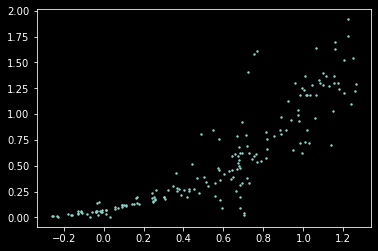

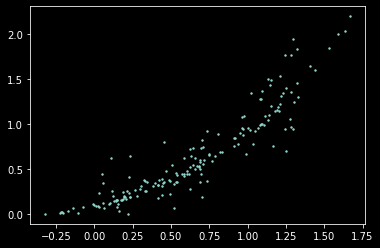

In [57]:
from sklearn.linear_model import LinearRegression
X = embedding2[:, embed_list2]
y = E1[embedding[:,0] < -1]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

from sklearn.linear_model import LinearRegression
X = embedding2[:, embed_list2]
y = E2[embedding[:,0] < -1]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

R^2 = 0.750756644155657
Coefficent(s): [ 0.52086321 -0.14490309]
SpearmanrResult(correlation=0.918413808625197, pvalue=2.1888517728390543e-72)
R^2 = 0.8362619833952736
Coefficent(s): [0.67656104 0.18756527]
SpearmanrResult(correlation=0.93693625456623, pvalue=8.148357395483435e-82)


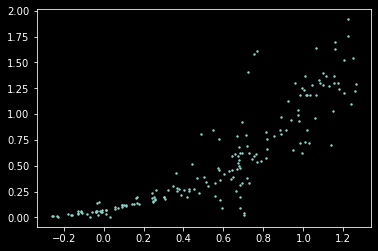

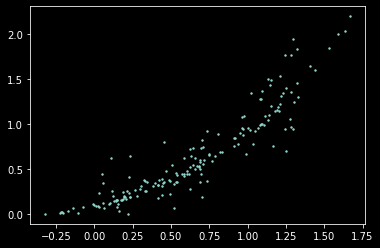

In [58]:
from sklearn.linear_model import LinearRegression
X = embedding[embedding[:,0] < -1, :][:, [0,2]]
y = E1[embedding[:,0] < -1]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

from sklearn.linear_model import LinearRegression
X = embedding[embedding[:,0] < -1, :][:, [0,2]]
y = E2[embedding[:,0] < -1]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

R^2 = 0.9021437079906901
Coefficent(s): [ 0.27796533 -0.06846676]
SpearmanrResult(correlation=0.9906455862977601, pvalue=7.794818059320776e-39)
R^2 = 0.9338334915601096
Coefficent(s): [0.53830954 0.1246676 ]
SpearmanrResult(correlation=0.9885375494071146, pvalue=6.0312239460606645e-37)


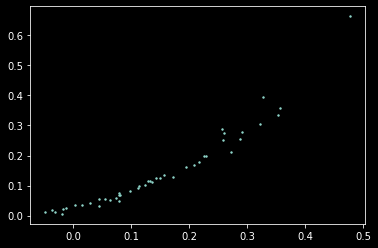

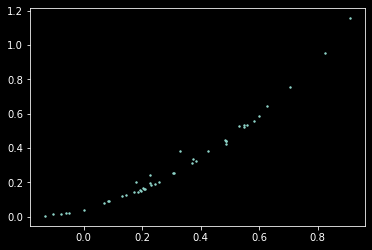

In [59]:
from sklearn.linear_model import LinearRegression
X = embedding[embedding[:,0] < -2, :][:, [0,2]]
y = E1[embedding[:,0] < -2]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

from sklearn.linear_model import LinearRegression
X = embedding[embedding[:,0] < -2, :][:, [0,2]]
y = E2[embedding[:,0] < -2]
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)

from scipy.stats import spearmanr
print(spearmanr(reg.predict(X), y))

plt.figure()
plt.scatter(reg.predict(X), y, s=2);

In [39]:
# print(out_name)
# with plt.style.context("default"):
#     plt.rcParams.update({'font.size': 15})
#     plt.figure(figsize=(5, 3))
#     plt.subplot(121)
#     for traj in raw_data[:5]:
#         plt.scatter(traj[:,0], traj[:,1], s=1)
#     plt.axis('equal')
#     plt.xlim(-np.pi,np.pi)
#     plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
#     plt.ylim(-4.5, 4.5)
#     plt.xlabel(r"Angle $\theta_1$")
#     plt.ylabel(r"Angular Velocity $\omega_1$")

#     plt.subplot(122)
#     for traj in raw_data[:5]:
#         plt.scatter(traj[:,2], traj[:,3], s=1)
#     plt.axis('equal')
#     plt.xlim(-np.pi,np.pi)
#     plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
#     plt.ylim(-4.5, 4.5)
#     plt.xlabel(r"Angle $\theta_2$")
#     plt.ylabel(r"Angular Velocity $\omega_2$")
#     plt.tight_layout()
#     plt.savefig(f"figures/{out_name}_data.pdf", bbox_inches="tight")

#     plt.figure(figsize=(7,6))
#     plt.subplot(221)
#     plt.scatter(embedding[:,0], embedding[:,2], c=E+3, s=2)
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 3")
#     plt.colorbar()
#     plt.title("Colored by $E$")
#     # plt.axis('equal')

#     plt.subplot(222)
#     Eidx = embedding[:,0] < -1 #E < -2
#     plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
#     plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=(E1+E2)[Eidx], s=2)
#     plt.colorbar()
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 3")
#     plt.title("Colored by $E_+ + E_-$")
#     # plt.axis('equal')

#     plt.subplot(223)
#     plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
#     plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=E2[Eidx], s=2)
#     plt.colorbar()
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 3")
#     plt.title("Colored by $E_+$")
#     # plt.axis('equal')

#     plt.subplot(224)
#     plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
#     plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=E1[Eidx], s=2)
#     plt.colorbar()
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 3")
#     plt.title("Colored by $E_-$")
#     # plt.axis('equal')

#     plt.tight_layout()
#     plt.savefig(f"figures/{out_name}_embedding.pdf", bbox_inches="tight")

#     plt.figure(figsize=(3, 3))
#     plt.imshow(dist_mat)
#     plt.xlabel("Trajectory Index")
#     plt.ylabel("Trajectory Index")
#     plt.tight_layout()
#     plt.savefig(f"figures/{out_name}_dist_mat.pdf", bbox_inches="tight")

#     plt.figure(figsize=(3, 3))
#     n_show_components = 10
#     plt.bar(
#         list(range(1, n_components+1)[:n_show_components]),
#         scores_pass[:n_show_components],
#         color="k",
#     )
#     plt.bar(
#         list(range(1, n_components+1)[:n_show_components]),
#         scores_fail[:n_show_components],
#         hatch="//",
#         color="gray",
#     )
#     plt.xticks(ticks=range(1, n_components+1)[:n_show_components])
#     plt.xlim(0.3, n_show_components + 0.7)
#     # plt.ylim(0, 1)
#     plt.ylabel("Score")
#     plt.xlabel("Component")
#     plt.hlines(threshold, 0, n_show_components+1, "gray", linestyles="dashed")
#     plt.savefig(f"figures/{out_name}_score.pdf", bbox_inches="tight")

#     plt.figure(figsize=(3, 3))
#     n_show_components = 10
#     plt.bar(
#         list(range(1, n_components+1)[:n_show_components]),
#         scores_pass2[:n_show_components],
#         color="k",
#     )
#     plt.bar(
#         list(range(1, n_components+1)[:n_show_components]),
#         scores_fail2[:n_show_components],
#         hatch="//",
#         color="gray",
#     )
#     plt.xticks(ticks=range(1, n_components+1)[:n_show_components])
#     plt.xlim(0.3, n_show_components + 0.7)
#     # plt.ylim(0, 1)
#     plt.ylabel("Score")
#     plt.xlabel("Component")
#     plt.hlines(threshold, 0, n_show_components+1, "gray", linestyles="dashed")
#     plt.savefig(f"figures/{out_name}_score2.pdf", bbox_inches="tight")

#     plt.figure(figsize=(7.5, 3))
#     plt.subplot(131)
#     plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
#     plt.scatter(embedding[embedding[:,2] > 4.5,0], embedding[embedding[:,2] > 4.5,2], c='r', s=2)
#     # plt.gca().add_patch(plt.Circle((embedding[embedding[:,2] > 4.5,0].mean(), embedding[embedding[:,2] > 4.5,2].mean()), 0.5, color='k', fill=False))
#     # plt.axis('off')
#     plt.xlabel("Component 1")
#     plt.ylabel("Component 3")
#     # plt.axis('equal')

#     plt.subplot(132)
#     for traj in raw_data[embedding[:,2] > 4.5]:
#         plt.scatter(traj[:,0], traj[:,1], s=1)
#     plt.axis('equal')
#     # plt.xlim(-np.pi,np.pi)
#     # plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
#     plt.ylim(-2.5, 2.5)
#     plt.xlabel(r"Angle $\theta_1$")
#     plt.ylabel(r"Angular Velocity $\omega_1$")

#     plt.subplot(133)
#     for traj in raw_data[embedding[:,2] > 4.5]:
#         plt.scatter(traj[:,2], traj[:,3], s=1)
#     plt.axis('equal')
#     # plt.xlim(-np.pi,np.pi)
#     # plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
#     plt.ylim(-2.5, 2.5)
#     plt.xlabel(r"Angle $\theta_2$")
#     plt.ylabel(r"Angular Velocity $\omega_2$")
#     plt.tight_layout()
#     plt.savefig(f"figures/{out_name}_orbit.pdf", bbox_inches="tight")


double_pendulum_1000_500_v0.5


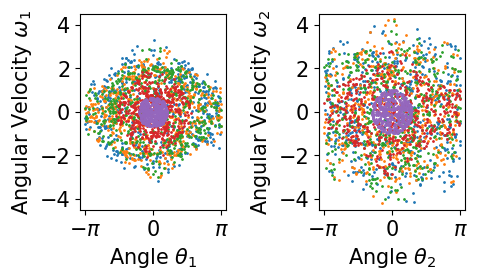

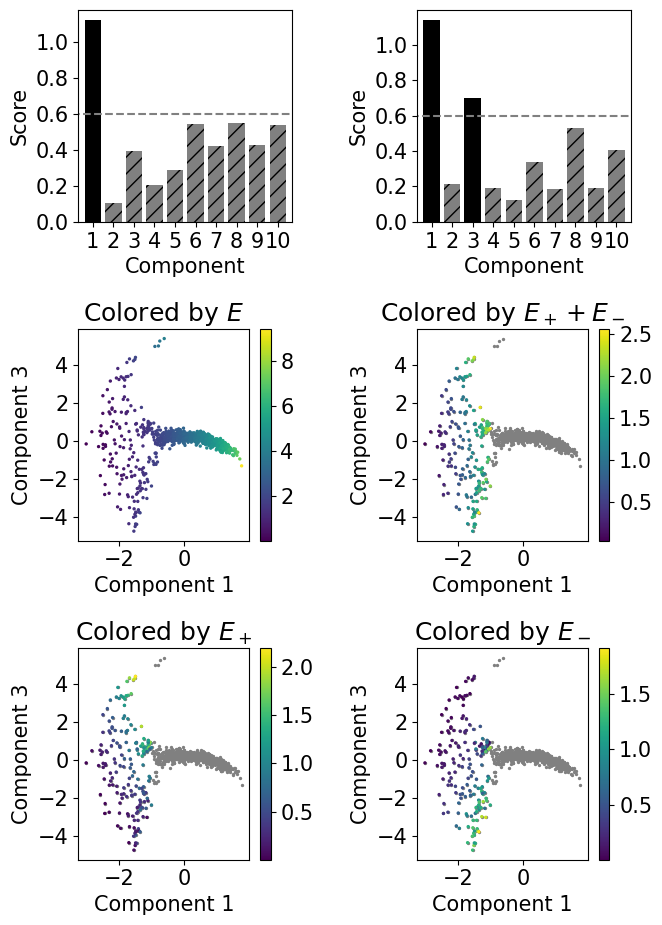

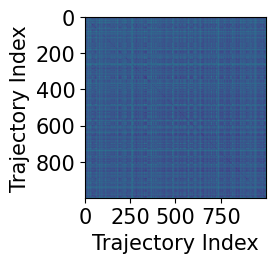

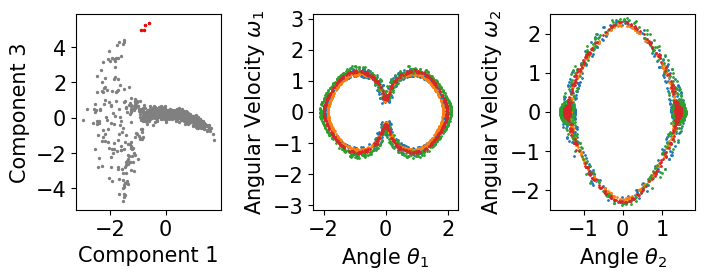

In [53]:
print(out_name)
with plt.style.context("default"):
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(5, 3))
    plt.subplot(121)
    for traj in raw_data[:5]:
        plt.scatter(traj[:,0], traj[:,1], s=1)
    plt.axis('equal')
    plt.xlim(-np.pi,np.pi)
    plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
    plt.ylim(-4.5, 4.5)
    plt.xlabel(r"Angle $\theta_1$")
    plt.ylabel(r"Angular Velocity $\omega_1$")

    plt.subplot(122)
    for traj in raw_data[:5]:
        plt.scatter(traj[:,2], traj[:,3], s=1)
    plt.axis('equal')
    plt.xlim(-np.pi,np.pi)
    plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
    plt.ylim(-4.5, 4.5)
    plt.xlabel(r"Angle $\theta_2$")
    plt.ylabel(r"Angular Velocity $\omega_2$")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_data.pdf", bbox_inches="tight")

    plt.figure(figsize=(7,9.5))
    plt.subplot(321)
    n_show_components = 10
    plt.bar(
        list(range(1, n_components+1)[:n_show_components]),
        scores_pass[:n_show_components],
        color="k",
    )
    plt.bar(
        list(range(1, n_components+1)[:n_show_components]),
        scores_fail[:n_show_components],
        hatch="//",
        color="gray",
    )
    plt.xticks(ticks=range(1, n_components+1)[:n_show_components])
    plt.xlim(0.3, n_show_components + 0.7)
    # plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.xlabel("Component")
    plt.hlines(threshold, 0, n_show_components+1, "gray", linestyles="dashed")
    plt.savefig(f"figures/{out_name}_score.pdf", bbox_inches="tight")

    plt.subplot(322)
    n_show_components = 10
    plt.bar(
        list(range(1, n_components+1)[:n_show_components]),
        scores_pass2[:n_show_components],
        color="k",
    )
    plt.bar(
        list(range(1, n_components+1)[:n_show_components]),
        scores_fail2[:n_show_components],
        hatch="//",
        color="gray",
    )
    plt.xticks(ticks=range(1, n_components+1)[:n_show_components])
    plt.xlim(0.3, n_show_components + 0.7)
    # plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.xlabel("Component")
    plt.hlines(threshold, 0, n_show_components+1, "gray", linestyles="dashed")
    plt.savefig(f"figures/{out_name}_score2.pdf", bbox_inches="tight")

    plt.subplot(323)
    plt.scatter(embedding[:,0], embedding[:,2], c=E+3, s=2)
    plt.xlabel("Component 1")
    plt.ylabel("Component 3")
    plt.colorbar()
    plt.title("Colored by $E$")
    # plt.axis('equal')

    plt.subplot(324)
    Eidx = embedding[:,0] < -1 #E < -2
    plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
    plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=(E1+E2)[Eidx], s=2)
    plt.colorbar()
    plt.xlabel("Component 1")
    plt.ylabel("Component 3")
    plt.title("Colored by $E_+ + E_-$")
    # plt.axis('equal')

    plt.subplot(325)
    plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
    plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=E2[Eidx], s=2)
    plt.colorbar()
    plt.xlabel("Component 1")
    plt.ylabel("Component 3")
    plt.title("Colored by $E_+$")
    # plt.axis('equal')

    plt.subplot(326)
    plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
    plt.scatter(embedding[Eidx,0], embedding[Eidx,2], c=E1[Eidx], s=2)
    plt.colorbar()
    plt.xlabel("Component 1")
    plt.ylabel("Component 3")
    plt.title("Colored by $E_-$")
    # plt.axis('equal')

    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_embedding.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    plt.imshow(dist_mat)
    plt.xlabel("Trajectory Index")
    plt.ylabel("Trajectory Index")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_dist_mat.pdf", bbox_inches="tight")

    plt.figure(figsize=(7.5, 3))
    plt.subplot(131)
    plt.scatter(embedding[:,0], embedding[:,2], c='gray', s=2)
    plt.scatter(embedding[embedding[:,2] > 4.5,0], embedding[embedding[:,2] > 4.5,2], c='r', s=2)
    # plt.gca().add_patch(plt.Circle((embedding[embedding[:,2] > 4.5,0].mean(), embedding[embedding[:,2] > 4.5,2].mean()), 0.5, color='k', fill=False))
    # plt.axis('off')
    plt.xlabel("Component 1")
    plt.ylabel("Component 3")
    # plt.axis('equal')

    plt.subplot(132)
    for traj in raw_data[embedding[:,2] > 4.5]:
        plt.scatter(traj[:,0], traj[:,1], s=1)
    plt.axis('equal')
    # plt.xlim(-np.pi,np.pi)
    # plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
    plt.ylim(-2.5, 2.5)
    plt.xlabel(r"Angle $\theta_1$")
    plt.ylabel(r"Angular Velocity $\omega_1$")

    plt.subplot(133)
    for traj in raw_data[embedding[:,2] > 4.5]:
        plt.scatter(traj[:,2], traj[:,3], s=1)
    plt.axis('equal')
    # plt.xlim(-np.pi,np.pi)
    # plt.xticks([-np.pi, 0, np.pi], ['$-\pi$','0','$\pi$'])
    plt.ylim(-2.5, 2.5)
    plt.xlabel(r"Angle $\theta_2$")
    plt.ylabel(r"Angular Velocity $\omega_2$")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_orbit.pdf", bbox_inches="tight")
